# Cardiovascular Disease Prediction

## For predicting the cardiovascular disease, I have used the following classification models:
- Ada Boost Classifier
- Gradient Boost Classifier
- LightGM Classifier

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
df.head()

,Unnamed: 0,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,3,3,48,2,150,100,1,1,0,0,1,1,28.710479
3,6,9,60,1,130,80,3,1,0,0,1,0,37.729725
4,8,13,48,1,110,70,1,1,0,0,1,0,28.440955


In [4]:
# Drop unnecessary columns
#df = df.drop(['Unnamed: 0', 'id', 'bp_category_encoded'], axis=1)

# Convert categorical variables
#df = pd.get_dummies(df, columns=['bp_category'], drop_first=True)

# Split into features and target
X = df.drop('cardio', axis=1)
y = df['cardio']

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
num_cols = ['age', 'ap_hi', 'ap_lo', 'bmi','cholesterol','gluc','smoke','alco','active']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# XGBoost Implementation

XGBoost Results:
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Accuracy: 0.7381
ROC AUC: 0.7947

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      4100
           1       0.76      0.64      0.69      3518

    accuracy                           0.74      7618
   macro avg       0.74      0.73      0.73      7618
weighted avg       0.74      0.74      0.74      7618


Confusion Matrix:
[[3376  724]
 [1271 2247]]


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

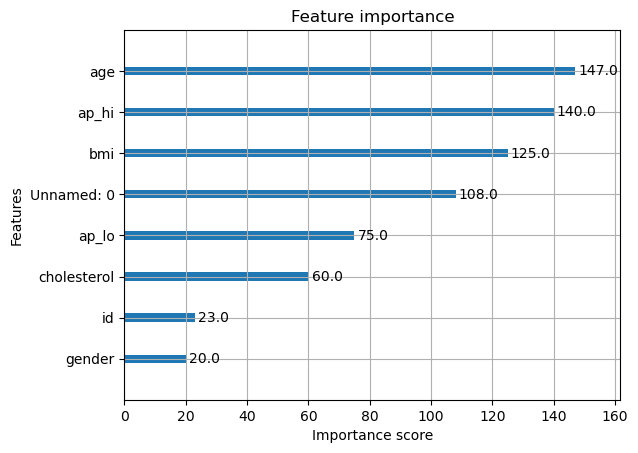

In [6]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search for best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
xgb.plot_importance(best_xgb)

# ADA Boost Implementation

In [8]:
# 1. Import Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 3. Define Features and Target
X = df.drop(columns=['cardio'])  # Replace 'Heart_Disease' with your actual target column if different
y = df['cardio']

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create the AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# 6. Train the model
model.fit(X_train, y_train)

# 7. Predict and Evaluate
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\Jincy_Denny\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.7327382515095826

Confusion Matrix:
 [[3420  680]
 [1356 2162]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77      4100
           1       0.76      0.61      0.68      3518

    accuracy                           0.73      7618
   macro avg       0.74      0.72      0.73      7618
weighted avg       0.74      0.73      0.73      7618



# Gradient Boosting Classifier Code (Scikit-learn)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 3. Define Features and Target
X = df.drop(columns=['cardio'])  # Replace 'Heart_Disease' with your actual target column if different
y = df['cardio']

# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Initialize Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 6. Train the model
model.fit(X_train, y_train)

# 7. Make Predictions
y_pred = model.predict(X_test)

# 8. Evaluate Performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7390391178787084

Confusion Matrix:
 [[3324  776]
 [1212 2306]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77      4100
           1       0.75      0.66      0.70      3518

    accuracy                           0.74      7618
   macro avg       0.74      0.73      0.73      7618
weighted avg       0.74      0.74      0.74      7618

